In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_gaussian_quantiles

from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [2]:
n_cluster = 20
n_samples = 3000
cluster_std = 1
n_features = 5
X,y = make_gaussian_quantiles(n_samples=n_samples, n_classes=n_cluster, cov=cluster_std, n_features=n_features, random_state=0)

In [3]:
y

array([ 6,  5,  2, ...,  8,  6, 15], shape=(3000,))

In [4]:
def clustering_evalutating(y_true, y_pred):
  ari = adjusted_rand_score(y_true, y_pred)
  nmi = normalized_mutual_info_score(y_true, y_pred)
  homogeneity = homogeneity_score(y_true, y_pred)
  completeness = completeness_score(y_true, y_pred)
  v_measure = v_measure_score(y_true, y_pred)
  
  return [ari, nmi, homogeneity, completeness, v_measure]

In [5]:
kmeans = KMeans(n_clusters=n_cluster)

dimensions_pca = []

for i in range(0,4):
  for j in range(i+1, 5):
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    dimensions_pca.append((i, j, clustering_evalutating(y, y_pred)))


con la pca questo problema non è risolvibile, ora proviamo con la LDA

In [6]:
lda = LDA(n_components=4)

In [7]:
lda.fit_transform(X, y)

array([[-0.82641909,  0.62469464,  1.19840167,  0.74094338],
       [ 1.13464193, -1.14471548, -0.14652876, -0.46297029],
       [ 0.38481484, -1.05284977, -0.12920383,  0.56510359],
       ...,
       [-1.03878816,  0.00954028,  1.41191286,  0.92232286],
       [-1.14873994,  0.59703147,  0.29621627, -1.19279978],
       [ 0.1500615 ,  0.40817964,  0.11645336,  1.74595535]],
      shape=(3000, 4))

In [8]:
kmeans = KMeans(n_clusters=n_cluster)

dimensions_lda = []

for i in range(0,4):
  for j in range(i+1, 5):
    kmeans.fit(X)
    y_lda_pred = kmeans.predict(X)
    
    dimensions_lda.append((i, j, clustering_evalutating(y, y_lda_pred)))

In [9]:
pca = PCA(n_components=2)

In [10]:
X_pca = pca.fit_transform(X)

In [11]:
def create_bar_chart(data):
    labels = [f"{a}-{b}" for a, b, _ in data]
    values = [c for _, _, c in data]

    transposed_values = np.array(list(zip(*values)))
    legend_labels = ['ari', 'nmi', 'homogeneity', 'completeness', 'v_measure']
    
    n_labels = len(labels)
    n_layers = transposed_values.shape[0]
    bar_width = 0.15 
    x_positions = np.arange(n_labels)

    fig, ax = plt.subplots(figsize=(12, 8))

    for i in range(n_layers):
        bar_position = x_positions - (n_layers / 2 - 0.5) * bar_width + i * bar_width
        
        bars = ax.bar(bar_position, transposed_values[i], width=bar_width, label=f"{legend_labels[i]}")


        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax.annotate(f'{height:.3f}',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),
                            textcoords="offset points",
                            ha='center',
                            va='bottom',
                            rotation=90,
                            fontsize=8)

    ax.set_xlabel('Coppie di Etichette', fontsize=12)
    ax.set_ylabel('Valore', fontsize=12)
    ax.set_title('Grafico a Barre Affiancate per Sezione', fontsize=14)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.legend(title="Legenda Sezioni")
    plt.tight_layout()

    plt.show()


risultati pca


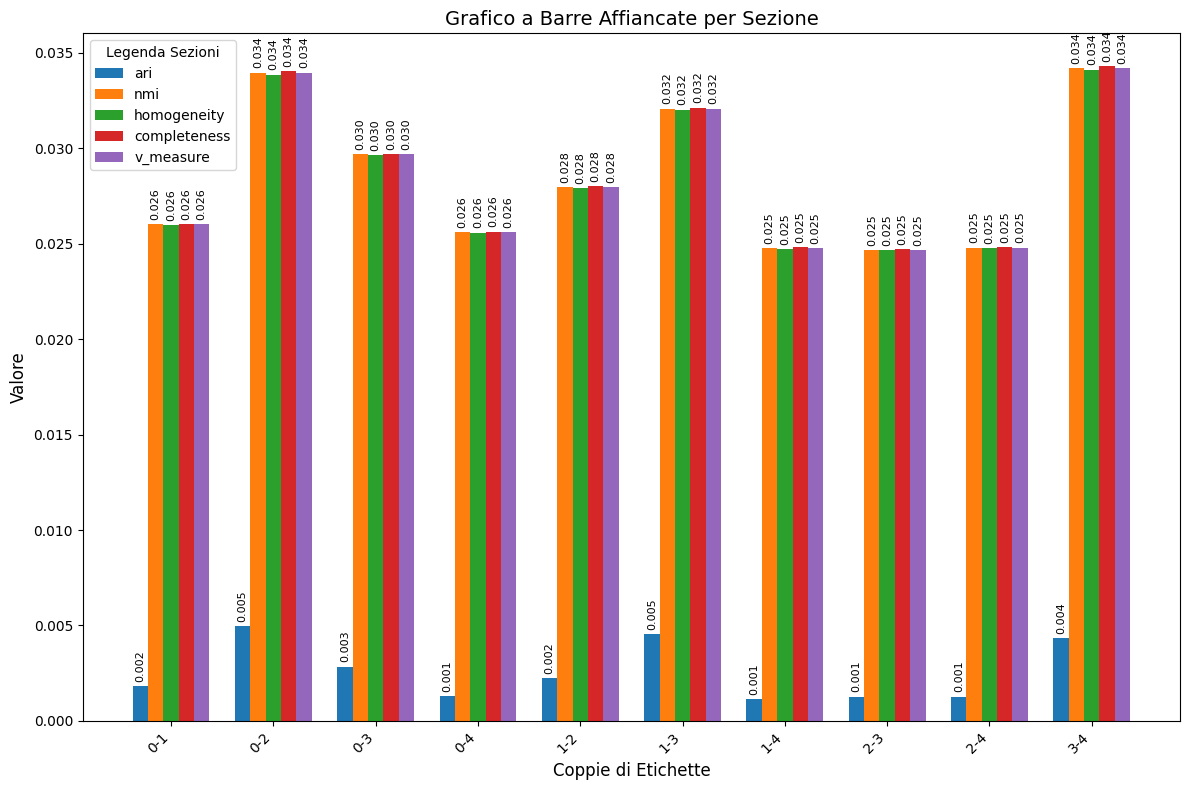

In [12]:
print('risultati pca')

create_bar_chart(dimensions_pca)

risultati lda


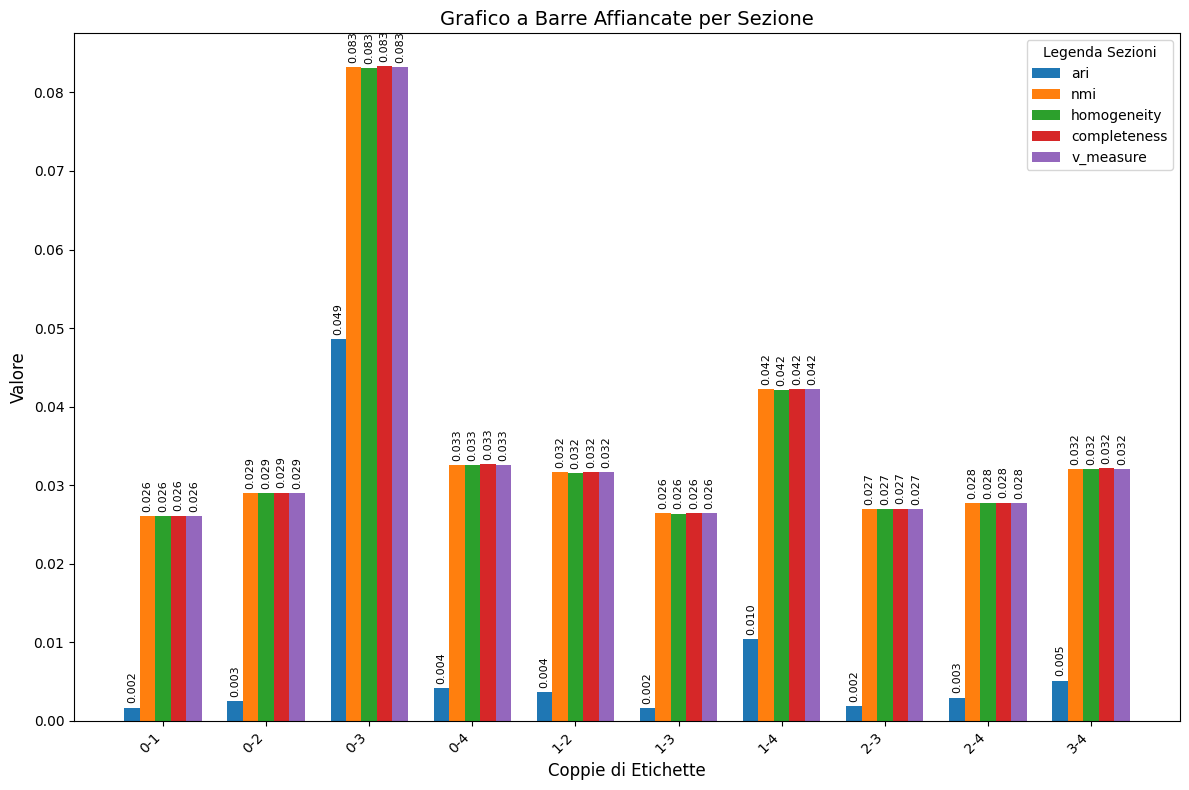

In [13]:
print('risultati lda')

create_bar_chart(dimensions_lda)

la lda presenta molto piu spesso performance migliori anche se spesso di poco